In [1]:
import pandas as pd
import numpy as np
 
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from utils_data import filter_by_category

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
sns.set(style="whitegrid", context='talk') #palette=['#D44D5C', '#43AA8B']

In [3]:
from datasets import load_dataset

data_es = load_dataset('head_qa', 'es' )
data_es

Reusing dataset head_qa (C:\Users\tec005m\.cache\huggingface\datasets\head_qa\es\1.1.0\473dc5357942a3ff52963bd73cad0d167bd1bbc1ca5ca0732ee7372b480dd735)


DatasetDict({
    train: Dataset({
        features: ['name', 'year', 'category', 'qid', 'qtext', 'ra', 'image', 'answers'],
        num_rows: 2657
    })
    test: Dataset({
        features: ['name', 'year', 'category', 'qid', 'qtext', 'ra', 'image', 'answers'],
        num_rows: 2742
    })
    validation: Dataset({
        features: ['name', 'year', 'category', 'qid', 'qtext', 'ra', 'image', 'answers'],
        num_rows: 1366
    })
})

In [4]:
training, validation, testing = data_es['train'], data_es['validation'], data_es['test']

In [5]:
pd.DataFrame(data=training)

,answers,category,image,name,qid,qtext,ra,year
0,"[{'aid': 1, 'atext': 'Son de tipo todo o nada....",biology,,Cuaderno_2013_1_B,1,Los potenciales postsinápticos excitadores:,3,2013
1,"[{'aid': 1, 'atext': 'Músculo liso.'}, {'aid':...",biology,,Cuaderno_2013_1_B,2,Placa motora es la unión entre la neurona moto...,2,2013
2,"[{'aid': 1, 'atext': 'Fibras musculares lisas....",biology,,Cuaderno_2013_1_B,3,NO generan potenciales de acción:,2,2013
3,"[{'aid': 1, 'atext': 'Corteza premotora.'}, {'...",biology,,Cuaderno_2013_1_B,4,En la iniciación de los movimientos voluntario...,1,2013
4,"[{'aid': 1, 'atext': 'Están inervados por fibr...",biology,,Cuaderno_2013_1_B,5,Los corpúsculos de Pacini:,4,2013
...,...,...,...,...,...,...,...,...
2652,"[{'aid': 1, 'atext': 'Cetonas.'}, {'aid': 2, '...",chemistry,,Cuaderno_2014_1_Q,231,La síntesis con éster malónico es un método im...,5,2014
2653,"[{'aid': 1, 'atext': 'Por utilizar la onda cua...",chemistry,,Cuaderno_2014_1_Q,232,El análisis por redisolución potenciométrica s...,3,2014
2654,"[{'aid': 1, 'atext': 'Sulfanil urea.'}, {'aid'...",chemistry,,Cuaderno_2014_1_Q,233,Tras la reacción de algunos xenobióticos con e...,5,2014
2655,"[{'aid': 1, 'atext': 'Ácido acético.'}, {'aid'...",chemistry,,Cuaderno_2014_1_Q,234,"Indicar, cuál de los compuestos relacionados a...",2,2014


In [6]:
training_categ_count = pd.DataFrame(training).groupby(by='category', as_index=False).agg({'qid': 'count'})
validation_categ_count = pd.DataFrame(validation).groupby(by='category', as_index=False).agg({'qid': 'count'})
testing_categ_count = pd.DataFrame(testing).groupby(by='category', as_index=False).agg({'qid': 'count'})

<ipython-input-7-090aa9b3863f>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(rotation=45, labels=['Biología', 'Química', 'Medicina', 'Enfermería', 'Farmacología',  'Psicología'])


Text(0, 0.5, 'Cantidad de instancias')

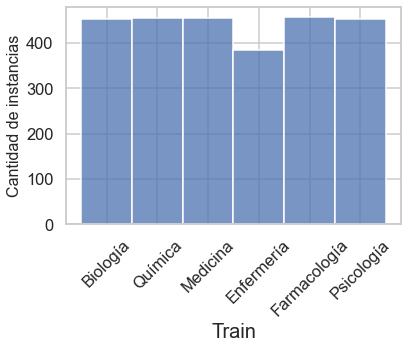

In [7]:
g = sns.histplot (training_categ_count, x="category", weights ='qid')
g.set_xticklabels(rotation=45, labels=['Biología', 'Química', 'Medicina', 'Enfermería', 'Farmacología',  'Psicología'])
plt.xlabel("Train", fontsize=20)
plt.ylabel("Cantidad de instancias",fontsize=16)

<ipython-input-8-f7975303284a>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(rotation=45, labels=['Biología', 'Química', 'Medicina', 'Enfermería', 'Farmacología',  'Psicología'])


Text(0, 0.5, 'Cantidad de instancias')

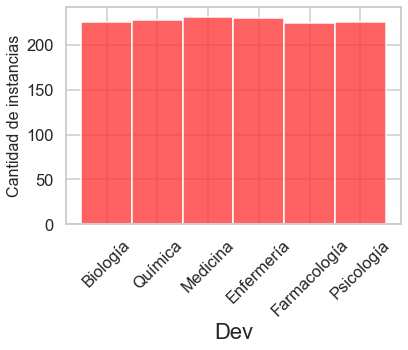

In [8]:
sns.set(style="whitegrid", context='talk', palette=['#FF2E2E']) #palette=['#D44D5C', '#43AA8B']
g = sns.histplot (validation_categ_count, x="category", weights ='qid')
g.set_xticklabels(rotation=45, labels=['Biología', 'Química', 'Medicina', 'Enfermería', 'Farmacología',  'Psicología'])
plt.xlabel("Dev", fontsize=22)
plt.ylabel("Cantidad de instancias",fontsize=16)

<ipython-input-9-355503eec3ff>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(rotation=45, labels=['Biología', 'Química', 'Medicina', 'Enfermería', 'Farmacología',  'Psicología'])


Text(0, 0.5, 'Cantidad de instancias')

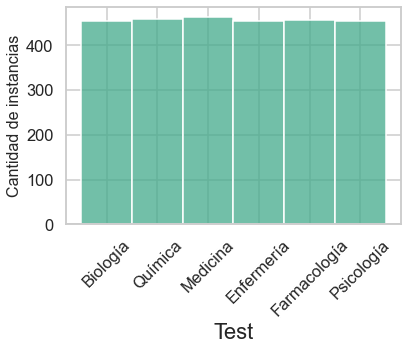

In [9]:
sns.set(style="whitegrid", context='talk', palette=['#43AA8B']) #palette=['#D44D5C', '#43AA8B']
g = sns.histplot (testing_categ_count, x="category", weights ='qid')
g.set_xticklabels(rotation=45, labels=['Biología', 'Química', 'Medicina', 'Enfermería', 'Farmacología',  'Psicología'])
plt.xlabel("Test", fontsize=22)
plt.ylabel("Cantidad de instancias",fontsize=16)

In [10]:
# g = sns.displot(validation_categ_count, x="Categoria", weights ='qid', )
# g.set_xticklabels(rotation=45)
# plt.xlabel("", fontsize=22)
# plt.ylabel("Cantidad de instancias",fontsize=16)

Text(10.815000000000005, 0.5, 'Cantidad de instancias')

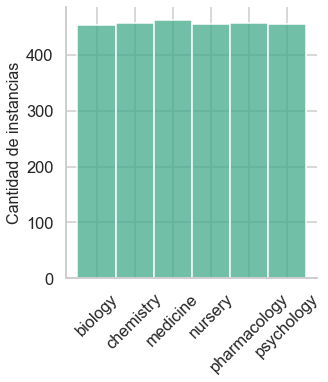

In [11]:
g = sns.displot(testing_categ_count, x="category", weights ='qid', )
g.set_xticklabels(rotation=45)
plt.xlabel("", fontsize=22)
plt.ylabel("Cantidad de instancias",fontsize=16)

In [12]:
import spacy
nlp = spacy.load('es_core_news_lg')  
all_stopwords = nlp.Defaults.stop_words.union({'a', 'y', 'o', 'u', 'siguientes'})

In [13]:
def get_word_counter(dataset):
    word_counter = Counter()
    for row in dataset:
        answers = row['answers']
        question = row['qtext']
        doc = nlp(question)
        for token in doc:
            if not token.is_punct:
                token = str(token).lower()
                if token not in all_stopwords:
                    if token in word_counter:
                        word_counter[token] += 1
                    else:
                        word_counter[token] = 1
        for a in answers:
            atext = a['atext']
            doc = nlp(atext)
            for token in doc:
                if not token.is_punct:
                    token = str(token).lower()
                    if token not in all_stopwords:
                        if token in word_counter:
                            word_counter[token] += 1
                        else:
                            word_counter[token] = 1            
    return word_counter

In [14]:
training_counter = get_word_counter(training)
validation_counter = get_word_counter(validation)
testing_counter = get_word_counter(testing)

In [15]:
t_most_common = training_counter.most_common(20)
t_most_common

[('tratamiento', 444),
 ('paciente', 384),
 ('años', 350),
 ('trastorno', 228),
 ('forma', 210),
 ('enfermedad', 203),
 ('diagnóstico', 179),
 ('tipo', 177),
 ('reacción', 162),
 ('presenta', 155),
 ('terapia', 153),
 ('e', 151),
 ('ácido', 149),
 ('células', 139),
 ('estudio', 138),
 ('pacientes', 135),
 ('presencia', 127),
 ('proteínas', 123),
 ('riesgo', 123),
 ('correcta', 122)]

In [ ]:
items, values = [], []
for item, value in t_most_common:
    items.append(items)
    values.append(value)

In [ ]:
len(items)

In [ ]:
# g = sns.histplot(data=items)
# g.set_xticklabels(rotation=45, labels=values)
# plt.xlabel("Train", fontsize=20)
# plt.ylabel("Cantidad de instancias",fontsize=16)

In [ ]:
tdf = training_counter.to_df()
g = sns.histplot (training_categ_count, x="category", weights ='qid')
g.set_xticklabels(rotation=45, labels=['Biología', 'Química', 'Medicina', 'Enfermería', 'Farmacología',  'Psicología'])
plt.xlabel("Train", fontsize=20)
plt.ylabel("Cantidad de instancias",fontsize=16)

In [ ]:
validation_counter.most_common(20)

In [ ]:
testing_counter.most_common(20)

In [ ]:
wc = WordCloud(background_color="white", width=2000,height=1000).generate_from_frequencies(training_counter)
plt.axis('off')
plt.imshow(wc)

In [ ]:
wc = WordCloud(background_color="white", width=2000,height=1000).generate_from_frequencies(testing_counter)
plt.axis('off')
plt.imshow(wc)

In [ ]:
wc = WordCloud(background_color="white", width=2000,height=1000).generate_from_frequencies(validation_counter)
plt.axis('off')
plt.imshow(wc)

### Por categorías

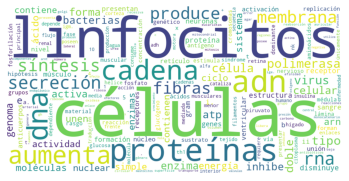

In [16]:
#Biologia
data = filter_by_category(training, 'biology')
biology_training_wc = get_word_counter(data)
wc = WordCloud(background_color="white", width=1000,height=500).generate_from_frequencies(biology_training_wc)
plt.axis('off')
plt.imshow(wc)

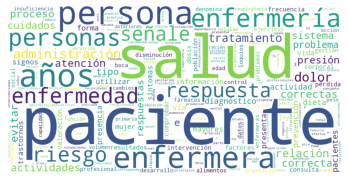

In [17]:
data = filter_by_category(training, 'nursery')
biology_training_wc = get_word_counter(data)
wc = WordCloud(background_color="white", width=1000,height=500).generate_from_frequencies(biology_training_wc)
plt.axis('off')
plt.imshow(wc)

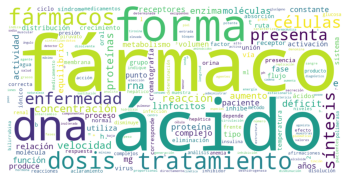

In [18]:
data = filter_by_category(training, 'pharmacology')
medicine_training_wc = get_word_counter(data)
wc = WordCloud(background_color="white", width=1000,height=500).generate_from_frequencies(medicine_training_wc)
plt.axis('off')
plt.imshow(wc)

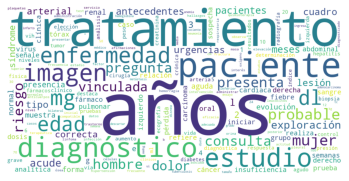

In [19]:
data = filter_by_category(training, 'medicine')
medicine_training_wc = get_word_counter(data)
wc = WordCloud(background_color="white", width=1000,height=500).generate_from_frequencies(medicine_training_wc)
plt.axis('off')
plt.imshow(wc)

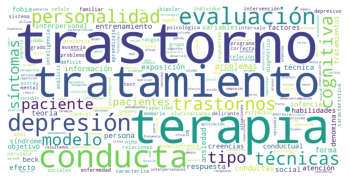

In [20]:
data = filter_by_category(training, 'psychology')
medicine_training_wc = get_word_counter(data)
wc = WordCloud(background_color="white", width=1000,height=500).generate_from_frequencies(medicine_training_wc)
plt.axis('off')
plt.imshow(wc)

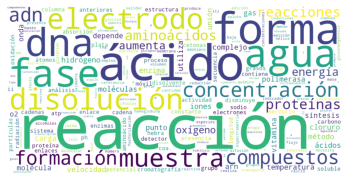

In [21]:
data = filter_by_category(training, 'chemistry')
medicine_training_wc = get_word_counter(data)
wc = WordCloud(background_color="white", width=1000,height=500).generate_from_frequencies(medicine_training_wc)
plt.axis('off')
plt.imshow(wc)